In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd 

data = pd.read_csv("Real 2.csv")  
data.head()  

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
data.shape

(118, 16)

In [4]:
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION        0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL RAINFALL    0
FLOODS             0
dtype: int64

In [5]:
data['FLOODS'] = data['FLOODS'].replace(['YES', 'NO'], [1, 0])

In [6]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [7]:
X = data.iloc[:,2:14]
X.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [8]:
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

In [9]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
X_scaled = pd.DataFrame(minmax.fit_transform(X), columns=X.columns)

# Display the first few rows
X_scaled.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0.343713,0.565823,0.237218,0.653179,0.176977,0.696472,0.423473,0.146603,0.322208,0.397277,0.955702,0.238872
1,0.080240,0.032911,0.263473,0.314807,0.118325,0.215332,0.763429,0.112431,0.927689,0.580497,0.379527,0.600396
2,0.038323,0.235443,0.013819,0.313473,0.286402,0.401376,0.629139,0.197984,0.619077,0.571886,0.375636,0.291296
3,0.283832,0.037975,0.147858,0.259671,0.265976,1.000000,0.410596,0.141932,0.373712,0.519824,0.007183,0.015826
4,0.014371,0.282278,0.042837,0.412628,0.306245,0.724872,0.259750,0.094239,0.362382,0.630757,0.128405,0.000495


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, f1_score

# Load the dataset
df = pd.read_csv('Real 2.csv')  # Update path if needed

# Report proportions
flood_proportions = df['FLOODS'].value_counts(normalize=True)
print("Proportion of flood labels:")
print(flood_proportions)

Proportion of flood labels:
FLOODS
YES    0.508475
NO     0.491525
Name: proportion, dtype: float64


In [11]:
import numpy as np
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds
k = 10

fold_indices = kfold_indices(X_scaled, k)



In [12]:
# all basic Machine Learning
# all basic Machine Learning

from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from statistics import stdev

from fractions import Fraction as fr
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  



kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_indices = list(kf.split(X_scaled))  # Changed 'X' to 'x'

#model = LogisticRegression()
#model = DecisionTreeClassifier()
#model = RandomForestClassifier()
#model = SVC(probability=True)
model = KNeighborsClassifier()

scores = []
roc_aucs = []
recalls = []
precisions=[]
f1=[]

for train_indices, test_indices in fold_indices:
    X_train, y_train = X_scaled.iloc[train_indices], y.iloc[train_indices]  # Changed 'X' to 'x'
    X_test, y_test =X_scaled.iloc[test_indices], y.iloc[test_indices]  # Changed 'X' to 'x'
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_roc_auc = roc_auc_score(y_test, y_pred_proba)
    fold_recall = recall_score(y_test, y_pred)
    fold_precision=precision_score(y_test, y_pred)
    fold_f1=f1_score(y_test, y_pred)

    
    scores.append(fold_accuracy)
    roc_aucs.append(fold_roc_auc)
    recalls.append(fold_recall)
    precisions.append(fold_precision)
    f1.append(fold_f1)
       

print("Accuracy Scores for Each Fold:", scores)

print("Mean Accuracy:", round(np.mean(scores),4))
print("Standard Deviation of Accuracy:", round(stdev(scores),2))
print("Mean Recall Score:", round(np.mean(recalls),4))
print("Mean precision Score:", round(np.mean(precisions),4))
print("Mean ROC AUC Score:", round(np.mean(roc_aucs),4))
print("Mean f1 Score:", round(np.mean(f1),4))

Accuracy Scores for Each Fold: [0.75, 0.75, 1.0, 0.75, 0.8333333333333334, 0.75, 0.8333333333333334, 0.6666666666666666, 0.6363636363636364, 0.9090909090909091]
Mean Accuracy: 0.7879
Standard Deviation of Accuracy: 0.11
Mean Recall Score: 0.7276
Mean precision Score: 0.8875
Mean ROC AUC Score: 0.868
Mean f1 Score: 0.774


In [14]:
# all basic Machine Learning
from sklearn.model_selection import KFold
from statistics import stdev
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
import xgboost as xgb

def initialize_models():
    model1 = LogisticRegression()
    model2 = RandomForestClassifier()
    model3 = SVC(probability=True,random_state=42)
    return [('lr', model1), ('rf', model2), ('svm', model3)]

# Function to evaluate metrics
def evaluate_model(model, X_scaled, y, kf):
    metrics = {"accuracy": [], "roc_auc": [], "recall": [], "precision": [], "f1": []}
    
    for train_indices, test_indices in kf.split(X_scaled):
        X_train, y_train = X_scaled.iloc[train_indices], y.iloc[train_indices]
        X_test, y_test = X_scaled.iloc[test_indices], y.iloc[test_indices]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        metrics["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["recall"].append(recall_score(y_test, y_pred))
        metrics["precision"].append(precision_score(y_test, y_pred))
        metrics["f1"].append(f1_score(y_test, y_pred))
        if y_pred_proba is not None:
            metrics["roc_auc"].append(roc_auc_score(y_test, y_pred_proba))
    
    return metrics


# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True,random_state=42)
fold_indices = list(kf.split(X_scaled))


# Results storage
results = {}

# Voting Classifier
models = initialize_models()
voting_clf = VotingClassifier(estimators=models, voting='soft')
voting_metrics = evaluate_model(voting_clf, X_scaled, y, kf)
results["Voting"] = voting_metrics

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=models, final_estimator=LogisticRegression())
stacking_metrics = evaluate_model(stacking_clf, X_scaled, y, kf)
results["Stacking"] = stacking_metrics

# Bagging Classifier
# Bagging Classifier using Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), 
                                 n_estimators=100, 
                                 random_state=42)
bagging_metrics = evaluate_model(bagging_clf, X_scaled, y, kf)
results["Bagging"] = bagging_metrics

# Boosting Classifier
boosting_clf = xgb.XGBClassifier(objective='binary:logistic',random_state=42, use_label_encoder=False, eval_metric='logloss')
boosting_metrics = evaluate_model(boosting_clf, X_scaled, y, kf)
results["Boosting"] = boosting_metrics
#=====================================0
# 5. Blending Classifier
class BlendingEnsemble:
    def __init__(self, models, meta_model):
        self.models = models
        self.meta_model = meta_model

    def fit(self, X, y, val_X, val_y):
        meta_features = []
        for name, model in self.models:
            model.fit(X, y)
            meta_features.append(
                model.predict_proba(val_X)[:, 1] if hasattr(model, "predict_proba") else model.predict(val_X)
            )
        meta_features = np.column_stack(meta_features)
        self.meta_model.fit(meta_features, val_y)

    def predict(self, X):
        meta_features = np.column_stack([
            model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else model.predict(X)
            for _, model in self.models
        ])
        return self.meta_model.predict(meta_features)

    def predict_proba(self, X):
        meta_features = np.column_stack([
            model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else model.predict(X)
            for _, model in self.models
        ])
        return self.meta_model.predict_proba(meta_features)

meta_model = LogisticRegression()
blending_results = {"accuracy": [], "roc_auc": [], "recall": [], "precision": [], "f1": []}

for train_indices, test_indices in fold_indices:
    X_train, y_train = X_scaled.iloc[train_indices], y.iloc[train_indices]
    X_val, y_val = X_scaled.iloc[test_indices], y.iloc[test_indices]
    
    base_model_predictions = []
    for name, model in models:
        model.fit(X_train, y_train)
        base_model_predictions.append(
            model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_val)
        )
    
    meta_features = np.column_stack(base_model_predictions)
    meta_model.fit(meta_features, y_val)
    
    y_pred = meta_model.predict(meta_features)
    y_pred_proba = meta_model.predict_proba(meta_features)[:, 1]
    
    blending_results["accuracy"].append(accuracy_score(y_val, y_pred))
    blending_results["roc_auc"].append(roc_auc_score(y_val, y_pred_proba))
    blending_results["recall"].append(recall_score(y_val, y_pred))
    blending_results["precision"].append(precision_score(y_val, y_pred))
    blending_results["f1"].append(f1_score(y_val, y_pred))

results["Blending"] = blending_results

#====================================
# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} Classifier Results:")
    print(f"Accuracy Scores for Each Fold: {metrics['accuracy']}")
    print(f"Mean Accuracy: {np.mean(metrics['accuracy']):.4f}")
    print(f"Standard Deviation of Accuracy: {stdev(metrics['accuracy']):.4f}")
    for metric_name in ['roc_auc', 'recall', 'precision', 'f1']:
        print(f"Mean {metric_name.capitalize()}: {np.mean(metrics[metric_name]):.4f}")

/home/5440e2d3-2ab8-4cb5-9d42-9bb469d44a04/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:59:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/5440e2d3-2ab8-4cb5-9d42-9bb469d44a04/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:59:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/5440e2d3-2ab8-4cb5-9d42-9bb469d44a04/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:59:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/5440e2d3-2ab8-4cb5-9d42-9bb469d44a04/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:59:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are


Voting Classifier Results:
Accuracy Scores for Each Fold: [1.0, 1.0, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.6666666666666666, 0.8333333333333334, 0.9090909090909091, 1.0]
Mean Accuracy: 0.9076
Standard Deviation of Accuracy: 0.0997
Mean Roc_auc: 0.9716
Mean Recall: 0.9080
Mean Precision: 0.9258
Mean F1: 0.9091

Stacking Classifier Results:
Accuracy Scores for Each Fold: [1.0, 1.0, 1.0, 0.75, 0.9166666666666666, 0.9166666666666666, 0.6666666666666666, 0.8333333333333334, 0.9090909090909091, 1.0]
Mean Accuracy: 0.8992
Standard Deviation of Accuracy: 0.1164
Mean Roc_auc: 0.9857
Mean Recall: 0.9423
Mean Precision: 0.8925
Mean F1: 0.9072

Bagging Classifier Results:
Accuracy Scores for Each Fold: [0.75, 0.8333333333333334, 0.8333333333333334, 0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.5, 0.8333333333333334, 0.8181818181818182, 1.0]
Mean Accuracy: 0.8235
Standard Deviation of Accuracy: 0.1329
Mean Roc_auc: 0.9324
Mean Recall: 0.8

In [17]:
# GRU Model definition
import numpy as np
import pandas as pd 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(32, input_shape=input_shape))  # 32 GRU units
    model.add(Dense(16, activation='relu'))  # Dense layer with 16 units
    model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_indices = list(kf.split(X_scaled))

# Initialize lists to store results
accuracies = []
roc_aucs = []
recalls = []
precisions = []
f1_scores = [] 

# Loop through each fold
for train_indices, test_indices in fold_indices:
    # Select the training and test data
    X_train_fold, y_train_fold = X_scaled.iloc[train_indices], y.iloc[train_indices]
    X_test_fold, y_test_fold = X_scaled.iloc[test_indices], y.iloc[test_indices]
    
    # Convert DataFrames to NumPy arrays and reshape the data for the GRU model
    X_train_fold_scaled = X_train_fold.values.reshape((X_train_fold.shape[0], 1, X_train_fold.shape[1]))
    X_test_fold_scaled = X_test_fold.values.reshape((X_test_fold.shape[0], 1, X_test_fold.shape[1]))
    
    # Create and train the GRU model
    gru_model = create_gru_model((X_train_fold_scaled.shape[1], X_train_fold_scaled.shape[2]))
    gru_model.fit(X_train_fold_scaled, y_train_fold, epochs=50, batch_size=16, verbose=0)
    
    # Make predictions
    y_pred = (gru_model.predict(X_test_fold_scaled) > 0.5).astype("int32")
    y_pred_proba = gru_model.predict(X_test_fold_scaled)
    
    # Calculate metrics
    fold_accuracy = accuracy_score(y_test_fold, y_pred)
    fold_roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    fold_recall = recall_score(y_test_fold, y_pred)
    fold_precision = precision_score(y_test_fold, y_pred)
    fold_f1 = f1_score(y_test_fold, y_pred)  # Calculate F1 score
    
    # Append the results for each fold
    accuracies.append(fold_accuracy)
    roc_aucs.append(fold_roc_auc)
    recalls.append(fold_recall)
    precisions.append(fold_precision)
    f1_scores.append(fold_f1)  # Append F1 score

# Results
print("GRU Model Results")
print("Accuracy Scores for Each Fold:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))
print("Standard Deviation of Accuracy:", np.std(accuracies))
print("Mean ROC AUC Score:", np.mean(roc_aucs))
print("Mean Recall Score:", np.mean(recalls))
print("Mean Precision Score:", np.mean(precisions))
print("Mean F1 Score:", np.mean(f1_scores))  # Print the mean F1 score

GRU Model Results
Accuracy Scores for Each Fold: [1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.9166666666666666, 0.75, 1.0, 1.0]
Mean Accuracy: 0.9416666666666667
Standard Deviation of Accuracy: 0.09895285072531598
Mean ROC AUC Score: 0.9828571428571429
Mean Recall Score: 0.9261904761904762
Mean Precision Score: 0.975
Mean F1 Score: 0.9436363636363636


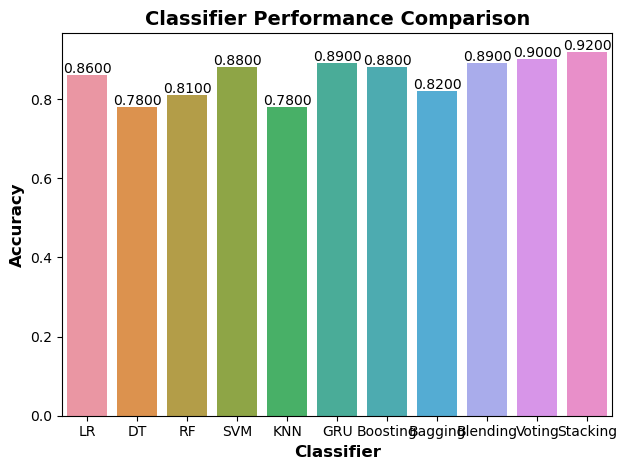

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def tr_split():
    return pd.DataFrame({
        'Name': ['LR', 'DT', 'RF', 'SVM', 'KNN', 'GRU','Boosting', 
                 'Bagging', 'Blending', 'Voting','Stacking'],
        'Score': [0.86, 0.78, 0.81, 0.88, 0.78, 0.89,
                  0.88,0.82, 0.89, 0.90, 0.92]
    })

data = tr_split()

axis = sns.barplot(x='Name', y='Score', data=data)
axis.set(xlabel='Classifier', ylabel='Accuracy', title='Classifier Performance Comparison')
# Set font properties to bold for all elements
plt.title('Classifier Performance Comparison', fontsize=14, fontweight='bold')
axis.set_xlabel('Classifier', fontsize=12, fontweight='bold')
axis.set_ylabel('Accuracy', fontsize=12, fontweight='bold')

# Make the ticks bold
#axis.tick_params(axis='both', which='major', labelsize=10, width=2, labelweight='bold')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")
plt.tight_layout()

# Option 1: Use a relative path that's more likely to exist
plt.savefig('classifier_performance_comparison.png', dpi=300)  # Saves in current directory

# Option 2: Show the plot without saving
plt.show()